## SVG Detector v3 running example

In this example, we will show how to apply our tool to simulation data and real data. 

Load libraries and datasets 

In [7]:
import sys
import pyreadr
import numpy as np
import pandas as pd 
sys.path.append('/Users/hereagain/Documents/GitHub/STproject/')
from SVG_detector_danwei import SvgDetector



### Simulation dataset

In [8]:
try_dat = pyreadr.read_r('/Users/hereagain/Documents/Emory/Research/Steve Qin/spatial_transcriptomics/dataset/Simulation/BC/bc_pattern_zero_30_replicate_24.RData')
count= try_dat['count']
genes = count.columns.tolist()
coord = try_dat['loc']
true_label = try_dat['gamma']

#==========================================
bc= SvgDetector(count, coord)

p_value1 = bc.run_SVG(genes,grid_size=3, base=3, filter=False, method='cauchy', dist='all')
all_values = bc.run_comprehensive_SVG(genes,method='cauchy', dist='nb')



100%|██████████| 100/100 [00:00<00:00, 2267.22it/s]


In [9]:
p_value1.head()

,gene,cauchy_gamma,cauchy_normal,cauchy_poisson,cauchy_nb
0,0,0.005358,0.003675,0.000000e+00,0.005334
1,1,0.004076,0.003726,0.000000e+00,0.004087
2,2,0.005156,0.004126,4.440892e-16,0.005186
3,3,0.004909,0.003176,0.000000e+00,0.004905
4,4,0.002749,0.003557,0.000000e+00,0.002771


In [10]:
all_values.head()

,gene,cauchy_nb_1,cauchy_nb_2,cauchy_nb_3,cauchy_nb_4,cauchy_nb_5,cauchy_nb_6,final_rank
96,96,0.074383,0.022805,0.006312,0.003192,0.006362,0.003039,1
66,66,0.077925,0.020270,0.005939,0.003200,0.005865,0.003626,2
93,93,0.068465,0.019109,0.005396,0.003315,0.006122,0.003255,3
59,59,0.062496,0.019556,0.005729,0.003038,0.006183,0.003162,4
27,27,0.053925,0.018466,0.005615,0.003248,0.005912,0.003398,5


### Real world data

We use human breast cancer dataset as an example

In [11]:
new_count = pd.read_csv('/Users/hereagain/Documents/Emory/Research/Steve Qin/spatial_transcriptomics/dataset/try dataset/human_breast_cancer_1/cleaned_human_breast_cancer_dat.tsv',sep='\t')


In [ ]:
new_count.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
# load coord 
coord = pd.read_csv('//Users/hereagain/Documents/Emory/Research/Steve Qin/spatial_transcriptomics/dataset/try dataset/human_breast_cancer_1/human_breast_cancer_1.loc.csv')

In [19]:
# if you wanna scale the coordinates 
def scale_coordinates(data, max_dimension=25000, target_size=15):
    # Calculate scale factor based on the largest dimension to maintain a square grid
    scale = max_dimension / target_size
    
    # Apply transformation and floor the coordinates to fit into the new grid size
    data['x'] = data['x'] / scale
    data['y'] = data['y'] / scale
    
    return data 
coord =coord.rename({'V5':'x','V6':'y'},axis=1)
coord=scale_coordinates(coord,25000,15)


In [20]:

brain = SvgDetector(new_count, coord)
# preprocessing data: filter genes and celles 
new_count_filter = brain.filtergenes(1,0.1,10)
new_count2 = new_count_filter.drop(columns=['x','y'])
gene_list = new_count2.columns.to_list()
p_value = brain.run_SVG(gene_list,grid_size=3, base=3, filter=True, method='cauchy', dist='gamma')





  0%|          | 0/11985 [00:00<?, ?it/s]/Users/hereagain/anaconda3/envs/ST/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:328: RuntimeWarning: divide by zero encountered in _nbinom_pdf
  return _boost._nbinom_pdf(x, n, p)
  0%|          | 0/11985 [00:00<?, ?it/s]/Users/hereagain/anaconda3/envs/ST/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:328: RuntimeWarning: divide by zero encountered in _nbinom_pdf
  return _boost._nbinom_pdf(x, n, p)
100%|██████████| 11985/11985 [00:02<00:00, 4007.99it/s]


In [23]:
all_results = brain.run_comprehensive_SVG(gene_list,method='cauchy', dist='gamma')

100%|██████████| 11985/11985 [00:02<00:00, 5574.19it/s]


In [21]:
p_value.head()

,gene,cauchy_gamma
0,LINC01128,0.007235
1,LINC02593,0.005249
2,SAMD11,0.002120
3,NOC2L,0.000736
4,KLHL17,0.003683


In [24]:
all_results.head()

,gene,cauchy_gamma_1,cauchy_gamma_2,cauchy_gamma_3,cauchy_gamma_4,cauchy_gamma_5,cauchy_gamma_6,final_rank
11341,AIFM3,0.274523,0.032099,0.014400,0.009831,NaN,NaN,1
34,MMP23B,0.266510,0.038754,0.011970,0.010138,NaN,NaN,2
1168,AL162595.1,0.260594,0.035661,0.012532,0.009719,NaN,NaN,3
2933,CFI,0.273714,0.029333,0.016697,0.009909,NaN,NaN,4
4457,MTERF1,0.234231,0.032719,0.014659,0.010040,NaN,NaN,5


### Visualization

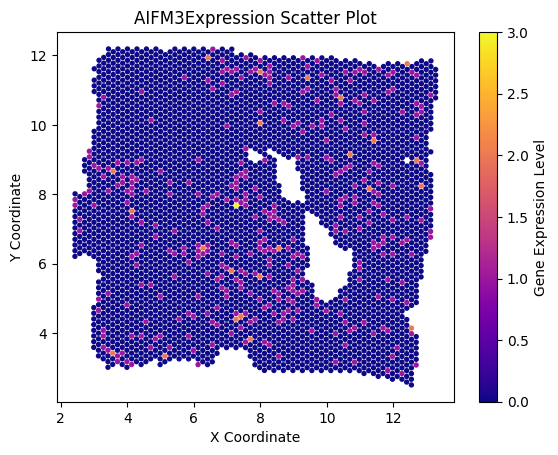

In [26]:
path = '/Users/hereagain/Desktop'
brain.gene_expression_plot('AIFM3','gamma',path)


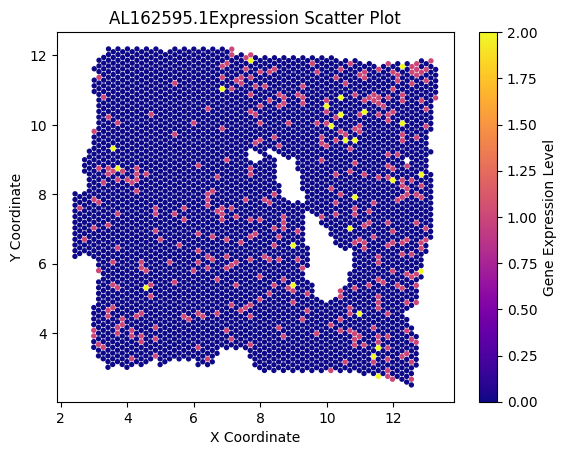

In [27]:
brain.gene_expression_plot('AL162595.1','gamma',path)

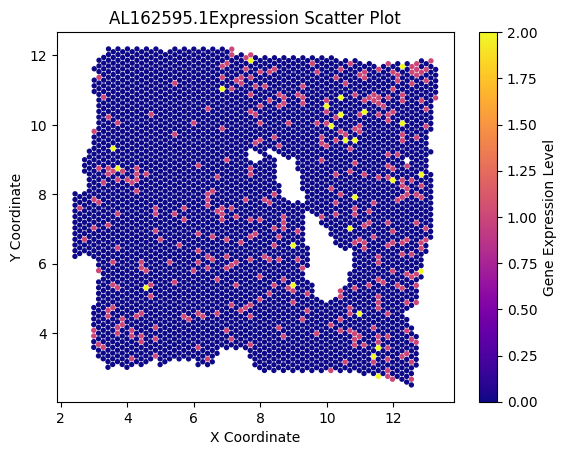

In [28]:
brain.gene_expression_plot('AL162595.1','MMP23B',path)